## **APACHE SPARK SHOWCASE:**

In very simple words Pandas run operations on a single machine whereas PySpark runs on multiple machines. If you are working on a Machine Learning application where you are dealing with larger datasets, PySpark is a best fit which could processes operations many times(100x) faster than Pandas.

Pandas uses a single machine to perform iterative processes on a dataset whilst apache spark uses multiple machines.

Pandas can load the data by reading CSV, JSON, SQL, many other formats and creates a DataFrame which is a structured object containing rows and columns (similar to SQL table).

It doesn’t support distributed processing hence you would always need to increase the resources when you need additional horsepower to support your growing data.

PySpark is a Spark library written in Python to run Python applications using Apache Spark capabilities. Using PySpark we can run applications parallelly on the distributed cluster (multiple nodes) or even on a single node.

How to Decide Between Pandas vs PySpark:

Below are the few considerations when to choose PySpark over Pandas

- If your data is huge and grows significantly over the years and you wanted to improve your processing time.

- If you want fault-tolerant.

- ANSI SQL compatibility.
- Language to choose (Spark supports Python, Scala, Java & R)
- When you want Machine-learning capability.
- Would like to read Parquet, Avro, Hive, Casandra, Snowflake e.t.c
- If you wanted to stream the data and process it real-time.

#### Installing apache spark in python

In [1]:
%pip install PyArrow
%pip install pyspark
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


PySpark uses Java underlying hence you need to have Java on your Mac. Since Java is a third party, you can install it using the Homebrew command brew. 

Since Oracle Java is not open source anymore, I am using the OpenJDK version 11. 

Run the below command in the terminal to install it.

`
brew install java`

and then enter the following

`sudo ln -sfn /opt/homebrew/opt/openjdk/libexec/openjdk.jdk \
     /Library/Java/JavaVirtualMachines/openjdk.jdk`

#### Initialize a spark session:

A SparkSession can be used create DataFrame, register DataFrame as tables, execute SQL over tables, cache tables, and read parquet files. To create a SparkSession, use the following builder pattern:

In [22]:
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark import SparkConf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.appName('PySpark DataFrame From External Files').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/05 15:57:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


#### Creating a dataframe using pyspark:

In [4]:
df = spark.read.csv('uber.csv', sep = ',', inferSchema = True, header = True)

inferSchema option tells the reader to infer data types from the source file. This results in an additional pass over the file resulting in two Spark jobs being triggered. It is an expensive operation because Spark must automatically go through the CSV file and infer the schema for each column.

#### DataFrame operations:

In [5]:
df

DataFrame[index: int, key: timestamp, fare_amount: double, pickup_datetime: timestamp, pickup_longitude: double, pickup_latitude: double, dropoff_longitude: double, dropoff_latitude: double, passenger_count: int]

In [6]:
df.printSchema()

root
 |-- index: integer (nullable = true)
 |-- key: timestamp (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- passenger_count: integer (nullable = true)



In [7]:
df.show(5)

+--------+-------------------+-----------+-------------------+------------------+-----------------+------------------+-----------------+---------------+
|   index|                key|fare_amount|    pickup_datetime|  pickup_longitude|  pickup_latitude| dropoff_longitude| dropoff_latitude|passenger_count|
+--------+-------------------+-----------+-------------------+------------------+-----------------+------------------+-----------------+---------------+
|24238194|2015-05-07 19:52:06|        7.5|2015-05-07 20:52:06|-73.99981689453125|40.73835372924805|   -73.99951171875|40.72321701049805|              1|
|27835199|2009-07-17 20:04:56|        7.7|2009-07-17 21:04:56|        -73.994355|        40.728225|         -73.99471|        40.750325|              1|
|44984355|2009-08-24 21:45:00|       12.9|2009-08-24 22:45:00|        -74.005043|         40.74077|        -73.962565|        40.772647|              1|
|25894730|2009-06-26 08:22:21|        5.3|2009-06-26 09:22:21|        -73.976124| 

In [8]:
df.select('index').show(5)

+--------+
|   index|
+--------+
|24238194|
|27835199|
|44984355|
|25894730|
|17610152|
+--------+
only showing top 5 rows



In [9]:
df.filter(df['fare_amount'] > 30).show(5)

+--------+-------------------+-----------+-------------------+------------------+------------------+------------------+-----------------+---------------+
|   index|                key|fare_amount|    pickup_datetime|  pickup_longitude|   pickup_latitude| dropoff_longitude| dropoff_latitude|passenger_count|
+--------+-------------------+-----------+-------------------+------------------+------------------+------------------+-----------------+---------------+
|19277743|2014-06-04 06:49:00|       39.5|2014-06-04 07:49:00|-73.78808000000001|         40.642187|        -73.865042|        40.725997|              4|
|22405517|2013-01-03 22:24:41|       56.8|2013-01-03 22:24:41|        -73.993498|         40.764686|        -73.993498|        40.764686|              1|
|25485719|2009-08-07 10:43:07|      49.57|2009-08-07 11:43:07|-73.97505799999999|          40.78882|-73.97505799999999|         40.78882|              1|
|37942404|2011-11-18 09:51:00|       30.9|2011-11-18 09:51:00|        -73.99

In [10]:
df.count()

200000

We can also convert the DF as a table which can be queried using SQL programatically:

In [11]:
df.createOrReplaceTempView("mytable")

sqlDF = spark.sql("SELECT * FROM mytable")
sqlDF.show()

+--------+-------------------+-----------+-------------------+------------------+------------------+------------------+------------------+---------------+
|   index|                key|fare_amount|    pickup_datetime|  pickup_longitude|   pickup_latitude| dropoff_longitude|  dropoff_latitude|passenger_count|
+--------+-------------------+-----------+-------------------+------------------+------------------+------------------+------------------+---------------+
|24238194|2015-05-07 19:52:06|        7.5|2015-05-07 20:52:06|-73.99981689453125| 40.73835372924805|   -73.99951171875| 40.72321701049805|              1|
|27835199|2009-07-17 20:04:56|        7.7|2009-07-17 21:04:56|        -73.994355|         40.728225|         -73.99471|         40.750325|              1|
|44984355|2009-08-24 21:45:00|       12.9|2009-08-24 22:45:00|        -74.005043|          40.74077|        -73.962565|         40.772647|              1|
|25894730|2009-06-26 08:22:21|        5.3|2009-06-26 09:22:21|        

In [12]:
df

DataFrame[index: int, key: timestamp, fare_amount: double, pickup_datetime: timestamp, pickup_longitude: double, pickup_latitude: double, dropoff_longitude: double, dropoff_latitude: double, passenger_count: int]

Find Count of Null, None, NaN of All DataFrame Columns

In [13]:
from pyspark.sql.functions import col,isnan,when,count

In [14]:
df_clean = df.dropna()
num_empty_rows = df.count() - df_clean.count()

print(num_empty_rows)

1


In [15]:
sqlDF = spark.sql("SELECT * FROM mytable where index = NULL")
sqlDF.show()

+-----+---+-----------+---------------+----------------+---------------+-----------------+----------------+---------------+
|index|key|fare_amount|pickup_datetime|pickup_longitude|pickup_latitude|dropoff_longitude|dropoff_latitude|passenger_count|
+-----+---+-----------+---------------+----------------+---------------+-----------------+----------------+---------------+
+-----+---+-----------+---------------+----------------+---------------+-----------------+----------------+---------------+



In [16]:
# df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

#### Add Column Based on Another Column of DataFrame

You need Latitude and Longitude to calculate the distance between two locations with following 

formula: = acos(sin(lat1)*sin(lat2)+cos(lat1)*cos(lat2)*cos(lon2-lon1))*6371 (6371 is Earth radius in km.)

In [17]:
#Add column from existing column
from pyspark.sql.functions import sin,acos,cos
from numpy import pi
import pyspark.sql.functions as func


lon_1 = df.pickup_longitude / (180/pi)
lon_2 = df.dropoff_longitude / (180/pi)
lat_1 = df.pickup_latitude / (180/pi)
lat_2 = df.dropoff_latitude / (180/pi)

df_journey = df.withColumn("journey_distance", func.round(acos(sin(lat_1)*sin(lat_2)+cos(lat_1)*cos(lat_2)*cos(lon_2-lon_1))*6371, 4))

In [18]:
df_journey.select(df_journey["fare_amount"],df_journey["journey_distance"]).show(6)
df_journey.select(df_journey["pickup_longitude"],df_journey["dropoff_longitude"], df_journey["pickup_latitude"],df_journey["dropoff_latitude"]).show(6)

+-----------+----------------+
|fare_amount|journey_distance|
+-----------+----------------+
|        7.5|          1.6833|
|        7.7|          2.4576|
|       12.9|          5.0364|
|        5.3|          1.6617|
|       16.0|          4.4754|
|        4.9|             0.0|
+-----------+----------------+
only showing top 6 rows

+------------------+------------------+-----------------+-----------------+
|  pickup_longitude| dropoff_longitude|  pickup_latitude| dropoff_latitude|
+------------------+------------------+-----------------+-----------------+
|-73.99981689453125|   -73.99951171875|40.73835372924805|40.72321701049805|
|        -73.994355|         -73.99471|        40.728225|        40.750325|
|        -74.005043|        -73.962565|         40.74077|        40.772647|
|        -73.976124|        -73.965316|        40.790844|        40.803349|
|        -73.925023|-73.97308199999999|        40.744085|        40.761247|
|-73.96901899999999|-73.96901899999999|         40.75591|

By comparing the 6th entry of journey distance to respective longitude and latitude we find something very interesting. Despite the customer being charged 4.9 There was no distance covered in the journey.

https://www.ridesharingdriver.com/uber-fees-cancellation-booking-cleaning-fees/

upon further investigation on the uber website - When a ride request or current trip is canceled, you may be paid a cancellation fee. Cancellation fees are noted in your payment statement.

Cancellation fee: Approximately $5 if you cancel two minutes after requesting a ride or if you take longer than 5 minutes to come out to your driver

Thus the reason for the customer being charged may be due to the fact that they have cancelled the request for a ride.

In [19]:
df_journey.createOrReplaceTempView("mytable")

sqlDF = spark.sql("SELECT fare_amount, journey_distance FROM mytable WHERE journey_distance = 0")
sqlDF.count()

5244

In [20]:
sqlDF = spark.sql("SELECT index, fare_amount, journey_distance FROM mytable WHERE journey_distance = 0 AND fare_amount < 15")
print(sqlDF.count())
sqlDF.show(10)

4327
+--------+-----------+----------------+
|   index|fare_amount|journey_distance|
+--------+-----------+----------------+
|44470845|        4.9|             0.0|
|44195482|        2.5|             0.0|
| 6379048|        8.5|             0.0|
|21993993|        6.0|             0.0|
| 1454546|        6.1|             0.0|
|17358122|        6.5|             0.0|
|40863188|        6.9|             0.0|
|54642873|        4.5|             0.0|
|45863790|        4.1|             0.0|
|11876316|       10.1|             0.0|
+--------+-----------+----------------+
only showing top 10 rows



Premium Uber rides (Uber Black, Black SUV, Lux)
You will be charged a $10 cancellation fee if you cancel more than 5 minutes after a driver accepts your ride request, or if your driver cancels your ride after waiting more than 15 minutes at your pickup location.

### Filtering data

Removing rows which contain Distances that are less than or equal to 0, since this potentially represents cancellations - we will come back to this later.

Furthermore let us also filter out fare amounts that are below 0 as this may represent refunds made to customers which we will also visit later on.

Finally - there are alot of fares which have a distance greater than 1000km this is simply ludicrous, there have been some very long Uber trips in the past, like a 400-mile trip from Williamsburg, VA to New York City back in 2016, a 650-mile trip from the DFW airport to Nashville, or the epic cross-country stunt by YouTuber Mr. Beast, who took a 2,256-mile (3500 km) Uber ride from North Carolina to California in 2017 - however these can be considered as outliers since these are not journeys that take place very often.

In [ ]:
df_journey.select(df_journey["passenger_count"]).filter(df_journey["passenger_count"] > 6).show()

+---------------+
|passenger_count|
+---------------+
|            208|
+---------------+



We can also see here that one of the journey's claims to have a passenger count of 208 people! the most an Uber can hold is 6 people so we would have to remove this too. Furthermore a driver would not pick up 0 passengers so we need to check for this too

In [ ]:
df_journey.select(df_journey["passenger_count"]).filter(df_journey["passenger_count"] < 1).count()

709

Finally let us use the lower and upper quartiles to identify any outliers:

IQR Can also be used to detect outliers in a few easy and straightforward steps:
- Calculate the 1st quartile Q1 .
- Calculate the 3rd quartile Q3 .
- Calculate IQR=Q3−Q1 I Q R = Q 3 − Q 1 .
- Calculate the bounds: Lower bound: Q1−1.5∗IQR. Upper bound: Q3+1.5∗IQR.

Flag any points outside the bounds as suspected outliers.

In [ ]:
df_journey.createOrReplaceTempView("distance_table")

sqlDF = spark.sql("SELECT fare_amount, journey_distance FROM mytable WHERE journey_distance > 0 and fare_amount > 1 and passenger_count < 7 and passenger_count > 0")
sqlDF.count()

194041

/opt/homebrew/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/homebrew/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


<Figure size 800x400 with 0 Axes>

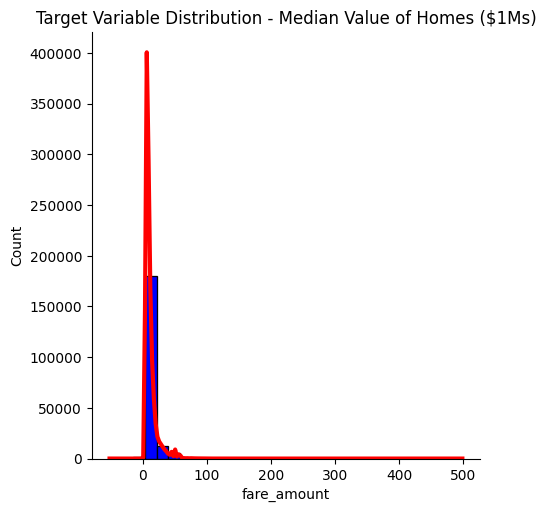

In [30]:
plt.figure(figsize=[8,4])
sns.displot(df_journey.toPandas()['fare_amount'], kde=True, color='red', bins=30, line_kws={'lw': 3}, facecolor='blue', edgecolor='black')
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

In [ ]:
lower_list = []
upper_list = []
for col in sqlDF.columns:
    median = sqlDF.agg(func.expr(f"approx_percentile({col}, 0.5)").alias(f"median({col})")).collect()[0][0]
    Q3 = sqlDF.agg(func.expr(f"approx_percentile({col}, 0.75)").alias(f"Q3({col})")).collect()[0][0]
    Q1 = sqlDF.agg(func.expr(f"approx_percentile({col}, 0.25)").alias(f"Q1({col})")).collect()[0][0]
    iqr = Q3 - Q1
    LB = Q1-1.5*iqr
    UB = Q3+1.5*iqr
    lower_list.append(LB)
    upper_list.append(UB)

print(lower_list)
print(upper_list)

[-3.75, -2.7436]
[22.25, 7.982]


We can see from the two lists above that the lower bounds for the filtered df is -3.75 for the fare amount and -2.74 for the distance however we have already filtered the df for values below zero so we do not need to worry about this.

On the other hand the upper bounds are 22.25 for the fare amount and 7.98 for the journey distance - therefore we can use these values to filter any values above this.

In [ ]:
disfare_df = sqlDF.filter(sqlDF.fare_amount < 30)
disfare_df = disfare_df.filter(disfare_df.journey_distance < 8).toPandas()

fare_amount         176707
journey_distance    176707
dtype: int64


Text(0, 0.5, 'fare_amount')

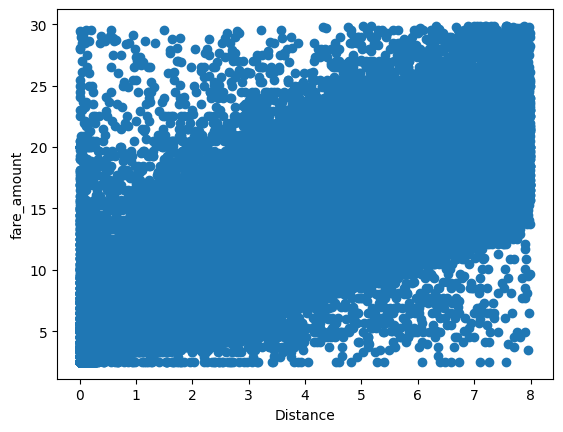

In [ ]:
print(disfare_df.count())
plt.scatter(disfare_df.journey_distance, disfare_df.fare_amount)
plt.xlabel("Distance")
plt.ylabel("fare_amount")

<Figure size 800x400 with 0 Axes>

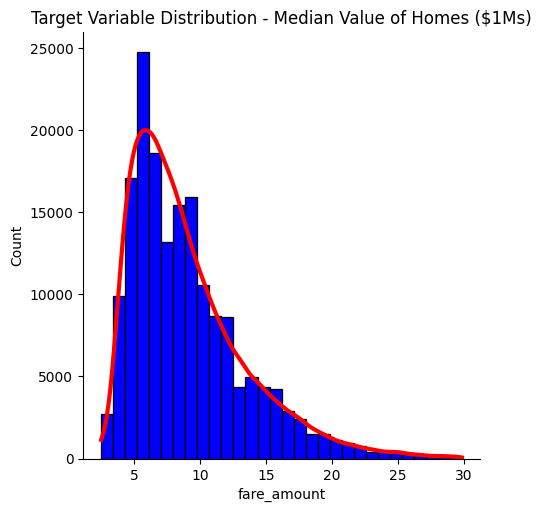

In [ ]:
plt.figure(figsize=[8,4])
sns.displot(disfare_df['fare_amount'], kde=True, color='red', bins=30, line_kws={'lw': 3}, facecolor='blue', edgecolor='black')
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

<Figure size 800x400 with 0 Axes>

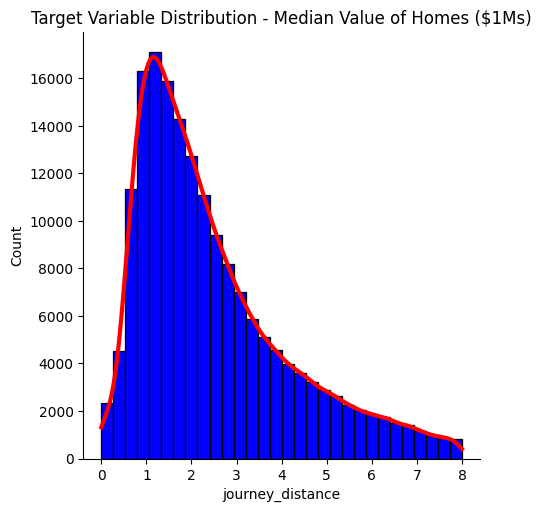

In [ ]:
plt.figure(figsize=[8,4])
sns.displot(disfare_df['journey_distance'], kde=True, color='red', bins=30, line_kws={'lw': 3}, facecolor='blue', edgecolor='black')
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()